#### <strong>第一次作品：主成分分析實作</strong>
學號：711233118

姓名：周芊妤
<hr>

 <font color=skyblue>作品目標</font>：
理解 PCA 的應用：PCA 不僅可以幫助模型降維，還能夠從複雜的資料集中抽取核心資訊，從而簡化整個資料分析過程。同時，對於變數間相關性和多變量分析的必要性也有清晰的認識，觀察多個變數之間的相關性對於資料分析非常重要，這可以通過箱形圖、散佈圖等可視化工具來實現，從而更好地理解資料狀態，進一步地，我們需要篩選出具有較高相關性和重要性的變數，以確保分析結果的準確性和可靠性。综上所述，對於 PCA 及其相關概念的全面理解將有助於我們更有效地進行資料分析與處理。

 


<hr>

第 1 題：

有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：

(1) 繪製變數間的相關係數圖，以觀察變數間是否存在相關性。

首先，我們導入必要的庫，接著使用 `load_wine` 函數加載 wine 數據集，然後創建一個新的 Figure。接下來，計算特徵變數之間的相關性，並將結果存儲在變量 R 中。接著創建了一個遮罩（mask），將對角線以上的元素設置為 True，其他元素設置為 False，這樣做是因為相關係數矩陣是對稱的，所以只需要呈現下半部分。最後，我們使用 `Seaborn.heatmap` 函數繪製相關性矩陣的熱度圖，這樣就能清晰地觀察變數之間的相關性，從而推斷紅酒成分變數之間的關聯程度。

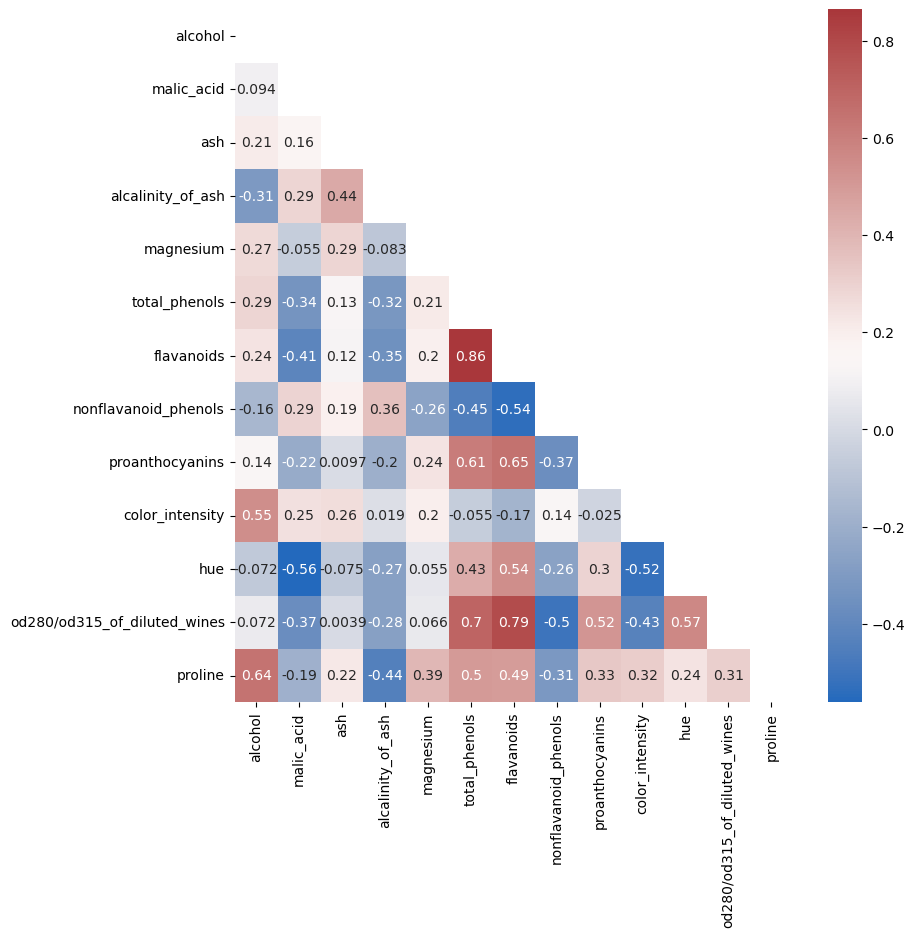

In [2]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
# Load the wine dataset
X, y = load_wine(return_X_y=True, as_frame=True)
labels = X.columns
# Plot the correlation matrix
plt.figure(figsize = (9, 9))
R = X.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask 
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag')
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 相關係數矩陣為對稱矩陣，因此僅呈現下半部。
- 顏色越紅表示兩變數間呈現越強的正相關性、越藍表示兩變數間呈現越強的負相關性。
- 顏色越淡表示兩變數之間的相關性越低。
- 正相關性最高的兩個變數為 flavanoids 以及 total_phenols，他們之間的相關係數為 0.86。
- 負相關性最高的兩個變數為 hue 以及 malic_acid，他們之間的相關係數為 -0.56。
- 相關性最低的兩個變數為 flavanoids 以及 ash，他們之間的相關係數為 0.12。

(2) 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。

首先，使用 `pd.read_excel()` 函數讀取名為 `wine.xlsx` 的 Excel 檔案中的資料，刪除 `Customer_Segment` 這欄，因為它不是紅酒的成分，將其存儲在 DataFrame 中。接著，利用 `ax.boxplot()` 函式繪製每個成分的箱形圖，同時指定箱形圖的外觀屬性，以便直觀比較變數之間的分佈差異。

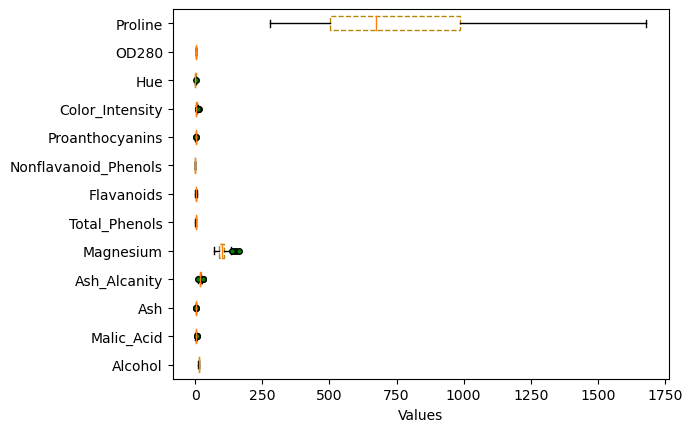

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('wine.xlsx')
df = df.drop(columns=['Customer_Segment'])
ratings = np.array(df)
categories = df.columns
fig, ax = plt.subplots()
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', markersize = 4, linestyle = 'none')
ax.boxplot(ratings, boxprops = boxprops, flierprops = flierprops, labels = categories, vert = False)
#boxprops:用於設置箱型圖框的屬性，例如線條樣式、顏色等
#flierprops:用於設置異常值（outlier）的屬性，例如標記形狀、顏色等
#labels:表示每個箱形圖的標籤，這裡使用的是 categories 變數，即資料框的列標籤
#vert:控制箱形圖的方向，如果設置為 False，則水平繪製箱形圖；
#如果設置為 True（默認值），則垂直繪製箱形圖 #若 False，表示水平繪製箱形圖。
ax.set_xlabel('Values')
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 由於紅酒成分中的 Proline 值較大，將其與其他變數放在同一張圖中時，其他變數會被壓縮而無法清楚觀察。
- 為了能夠清楚地觀察所有變數，需要對資料進行標準化處理。

首先，讀取名為 `wine.xlsx` 的 Excel 檔案中的資料，將其存儲在 DataFrame 中。接著，使用 `StandardScaler()` 函式對資料做標準化。最後，使用 `ax.boxplot()` 將標準化後的資料繪製箱形圖。

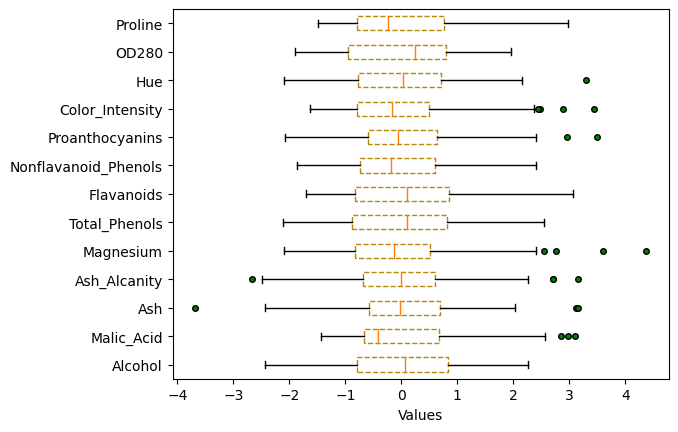

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('wine.xlsx')
df = df.drop(columns=['Customer_Segment'])

# 標準化資料
scaler = StandardScaler()
ratings = np.array(df)
scaler.fit(ratings)
ratings_ = scaler.transform(ratings)

# 使用標準化後的資料繪製箱形圖
categories = df.columns
fig, ax = plt.subplots()
boxprops = dict(linestyle='--', linewidth=1, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none')
ax.boxplot(ratings_, boxprops=boxprops, flierprops=flierprops, labels=categories, vert=False)
ax.set_xlabel('Values')

plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 透過標準化後的資料，我們能夠清晰地觀察到所有變數本身的型態以及它們之間的關係。
- 在資料中，具有離群值的變數包括：Hue、Color_Intensity、Proanthocyanins、Magnesium、Ash_Alcanity、Ash 及 Malic_Acid，其中，Magnesium 的離群值數量最多，共有 4 個。
- Malic_Acid 的分佈右偏最為嚴重，表示資料中有較多的值集中在較小的數值範圍內。
- OD280 的分佈左偏最為嚴重，表示資料中有較多的值集中在較大的數值範圍內。
- 在箱形圖中，四分位距最大的變數為 OD280，而最小的則是 Proanthocyanins。

最後，我們可以將標準化前後的箱形圖放在一起比對，以便更清楚地觀察資料的分佈情況在標準化前後的差異。

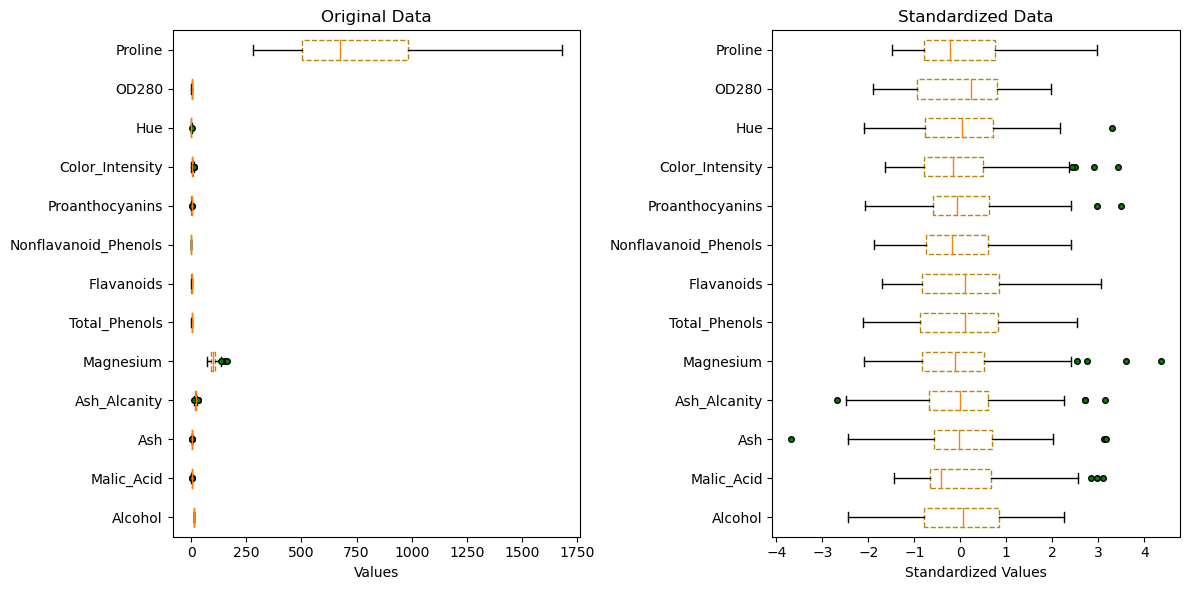

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 讀取原始資料
df = pd.read_excel('wine.xlsx')
df = df.drop(columns=['Customer_Segment'])
ratings = np.array(df)
categories = df.columns

# 標準化資料
scaler = StandardScaler()
ratings_std = scaler.fit_transform(ratings)

# 設置圖表
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 原始資料的箱形圖
boxprops = dict(linestyle='--', linewidth=1, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none')
axes[0].boxplot(ratings, boxprops=boxprops, flierprops=flierprops, labels=categories, vert=False)
axes[0].set_xlabel('Values')
axes[0].set_title('Original Data')

# 標準化後資料的箱形圖
boxprops_std = dict(linestyle='--', linewidth=1, color='darkgoldenrod')
flierprops_std = dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none')
axes[1].boxplot(ratings_std, boxprops=boxprops_std, flierprops=flierprops_std, labels=categories, vert=False)
axes[1].set_xlabel('Standardized Values')
axes[1].set_title('Standardized Data')

plt.tight_layout()
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 將兩者放在一起比對，可以明顯感受到經標準化後的箱形圖更清楚明瞭。

(3) 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

首先，從 Excel 檔案中讀取了名為 wine.xlsx 的資料，然後刪除了其中的 Customer_Segment 列。接著，將資料進行標準化處理，並將標準化後的資料轉換為 NumPy 陣列，隨後計算了標準化後資料基於樣本的共變異數矩陣 Sx_formula。利用 `numpy.linalg.eig`函數計算了 Sx 的特徵值和特徵向量，並將特徵值按降序排列。接著，利用特徵值和特徵向量構建了新的資料矩陣 Sigma_x，其中對角線元素為特徵值，其餘元素為零。\
創建一個新的 Matplotlib 圖形，並畫出一個折線圖，x 軸為特徵值的索引，y 軸為特徵值的大小，這個折線圖稱為 Scree 圖，用於顯示每個主成分的特徵值，以幫助選擇要保留的主成分數量。創建另一個 Matplotlib 圖形，並在同一張圖上繪製兩個軸，其中一個軸繪製特徵值的長條圖，另一個軸繪製解釋變異量的累積百分比，這個圖稱為 Pareto 圖，通常用於顯示主成分的累積貢獻，以幫助決定保留多少個主成分。

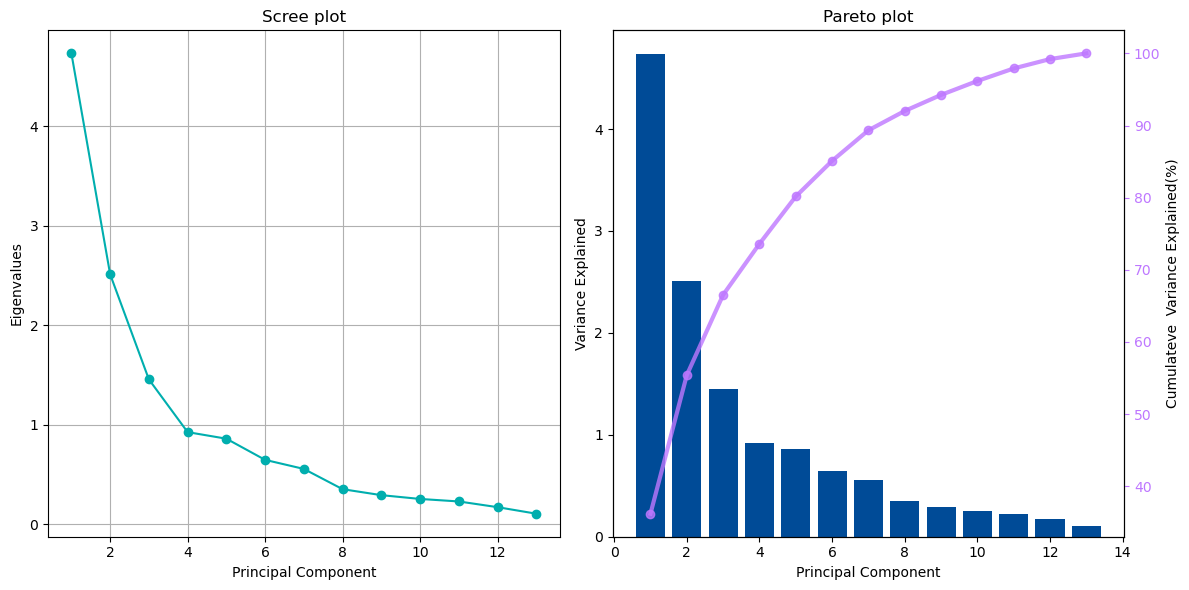

In [61]:
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 讀取資料並進行標準化
df1 = pd.read_excel('wine.xlsx')
df = df1.drop(columns=['Customer_Segment'])
ratings_ = StandardScaler().fit_transform(df)

# ratings_ is a 329 by 9 data matrix
Sx = np.cov(ratings_.T, bias=False) #計算資料矩陣ratings_的轉置矩陣的共變異數矩陣Sx
N = ratings_.shape[0]
mu_x = ratings_.mean(axis = 0)
Tmp = ratings_ - mu_x #計算中心化的資料矩陣
# Tmp = ratings_ − np.tile(mu_x, (N, 1))
Sx_formula = Tmp.T @ Tmp / (N - 1) #計算基於樣本的共變異數矩陣

from numpy.linalg import eig
w, v = eig(Sx) #特徵值和特徵向量
idx = np.argsort(-w) #sort eigenvalues in descending order #降維 #將特徵值按照降序排列
# idx = np.argsort(w)[::−1]
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T
#新的資料矩陣 Sigma_x，其中對角線元素為特徵值，其餘元素為零

# 繪製 Scree plot 和 Pareto plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scree plot
x = np.arange(1, 1+len(eigvals))
axs[0].plot(x, eigvals, marker='o', color='#00AEAE') 
axs[0].set_title('Scree plot')
axs[0].grid(True) 
axs[0].set_xlabel('Principal Component')
axs[0].set_ylabel('Eigenvalues')  # 添加 y 軸標籤

# Pareto plot
axs[1].bar(x, eigvals, color='#004B97') 
axs2 = axs[1].twinx()
axs2.plot(x, eigvals.cumsum()/eigvals.sum()*100, marker='o', color='#BE77FF', alpha=0.8, lw=3) 
axs2.tick_params(axis='y', colors='#BE77FF')
axs2.set_ylabel('Cumulateve  Variance Explained(%)')  # 添加第二個 y 軸標籤
axs[1].set_xlabel('Principal Component')
axs[1].set_ylabel('Variance Explained')  # 添加 y 軸標籤
axs[1].set_title('Pareto plot')

plt.tight_layout()
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- Scree plot 是一種用於 PCA 的視覺化工具，其中 x 軸表示主成分，y 軸則表示對應的特徵值。
- 特徵值越小，其對應的主成分或因子所包含的信息量越少。當主成分數量增加時，特徵值呈現下降的趨勢。
- Pareto plot 顯示了每個主成分的貢獻度，以及主成分的累積貢獻度。
- 每個長條代表一個主成分，其高度代表該主成分的特徵值大小，即其貢獻度。
- 折線則表示累積貢獻度，以百分比表示，當折線越接近 100% 時，表示累積貢獻度越高，即前幾個主成分所包含的信息量越多。
- 在 Principal Component = 4 之後，曲線開始平緩，這個點之後的主成分所包含的信息量很少。
- 根據 Scree plot、Pareto plot 的趨勢選擇適當的主成分數量，忽略主成分數量大於 4 的部分，以達到降低數據維度的目的，同時保留足夠的信息量。

(4) 資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。如圖四（左）。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。

首先，從 Excel 檔案中讀取了名為 wine.xlsx 的資料，然後刪除了其中的 Customer_Segment 列。接著，利用 PCA 取得前 2 項主成分並繪製散佈圖。

C:\Users\ChienYu\AppData\Local\Temp\ipykernel_24360\986318248.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis') #X_pca[:, 0]表示主成分1的值，X_pca[:, 1]表示主成分2的值 #使用'viridis'顏色地圖


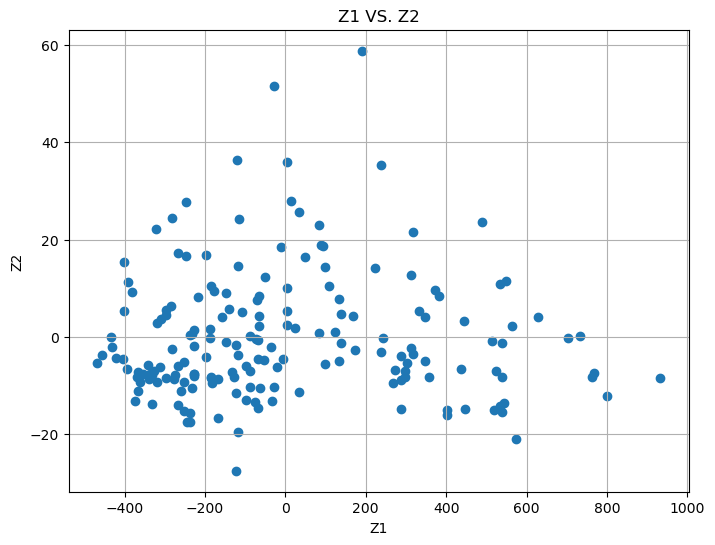

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 讀取資料
df1 = pd.read_excel('wine.xlsx')
df = df1.drop(columns=['Customer_Segment'])

# PCA
pca = PCA(n_components=2) #利用PCA取得前2項主成分(只保留兩個主成分)
X_pca = pca.fit_transform(df)

# 繪製散布圖
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis') #X_pca[:, 0]表示主成分1的值，X_pca[:, 1]表示主成分2的值 #使用'viridis'顏色地圖
plt.title('Z1 VS. Z2')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.grid(True)
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 在此散佈圖中，特徵並未經過標準化處理。
- 由於特徵沒有經過標準化，不同特徵之間的的尺度可能不同，這可能導致 PCA 對特徵的變化更為敏感而受到影響。
- 當特徵之間的尺度差異較大時，PCA 往往會更加受到主成分之間尺度差異的影響，進而導致得到的主成分之間的關係有所不同。
- 為了更準確地觀察散佈圖，需要對特徵進行標準化處理。

首先，從 Excel 檔案中讀取了名為 wine.xlsx 的資料，然後刪除了其中的 Customer_Segment 列。接著，先將特徵做標準化處理，再利用 PCA 取得前 2 項主成分並繪製散佈圖。

C:\Users\ChienYu\AppData\Local\Temp\ipykernel_26808\3830487959.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis') #X_pca[:, 0]表示主成分1的值，X_pca[:, 1]表示主成分2的值 #使用'viridis'顏色地圖


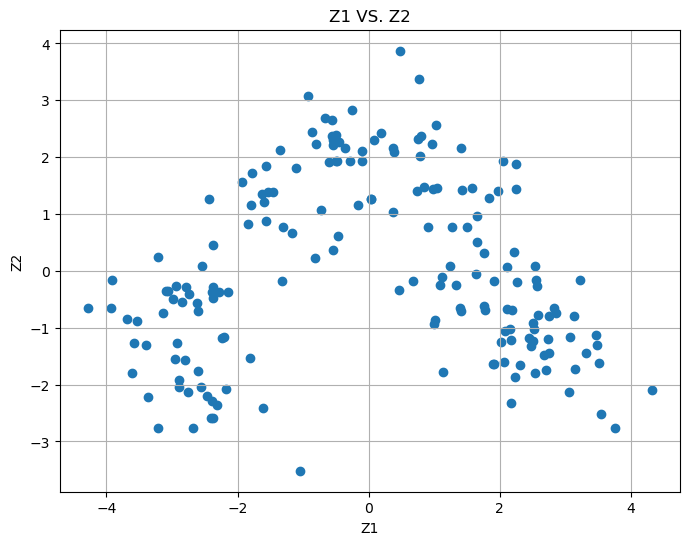

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 讀取資料
df1 = pd.read_excel('wine.xlsx')
df = df1.drop(columns=['Customer_Segment'])

# 標準化特徵
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# PCA
pca = PCA(n_components=2) #利用PCA取得前2項主成分(只保留兩個主成分)
X_pca = pca.fit_transform(X_scaled)

# 繪製散布圖
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis') #X_pca[:, 0]表示主成分1的值，X_pca[:, 1]表示主成分2的值 #使用'viridis'顏色地圖
plt.title('Z1 VS. Z2')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.grid(True)
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 在此散佈圖中，特徵先經過標準化處理。
- 不同特徵之間的的尺度相同，可以清楚地得到精確的散佈圖。
- 透過這張散佈圖，明顯可以看出資料分佈分成了 3 群。
- 此3群意味著這些酒來自哪個酒莊。

(5) 再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。

依序上一題繪製標準化後的散佈圖，根據 `Customer_Segment` 的分類，將每個分類的數據點以不同顏色進行了分組並繪製出來。

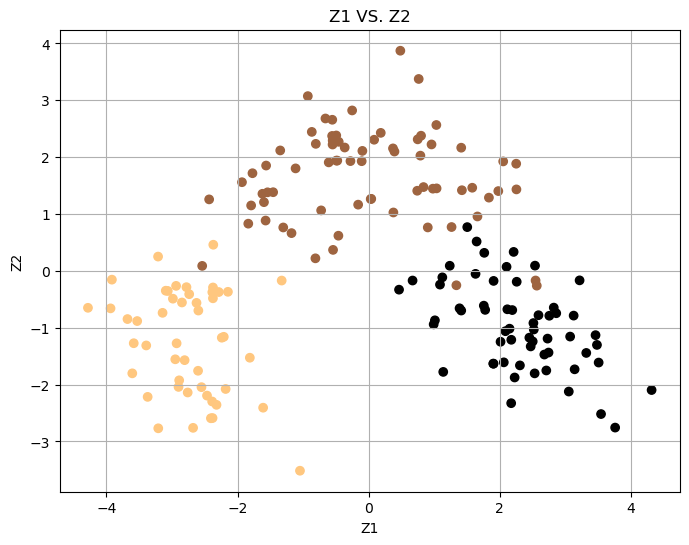

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 讀取資料
df1 = pd.read_excel('wine.xlsx')
df = df1.drop(columns=['Customer_Segment'])

# 標準化特徵
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# PCA
pca = PCA(n_components=2) #利用PCA取得前2項主成分(只保留兩個主成分)
X_pca = pca.fit_transform(X_scaled)

# 根據 'Customer_Segment' 列分類
segments = df1['Customer_Segment']

# 繪製散布圖
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df1['Customer_Segment'], cmap='copper') 
#X_pca[:, 0]表示主成分1的值，X_pca[:, 1]表示主成分2的值 #使用'viridis'顏色地圖
plt.title('Z1 VS. Z2')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.grid(True)
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 將特徵對應的標籤塗上顏色添加到散佈圖上可以更清楚地顯示資料點之間的分佈和結構。
- 即使使用 PCA 降維，仍然可能存在一些點被錯誤地歸類到其他群中的情況。
- 這可能是因為 PCA 是根據資料中的變異性來找到新的特徵空間，有時無法捕捉到所有的資料結構，導致分類有誤差。
- 這種誤差通常是很小的，特別是當資料集的結構較簡單時。

(6) 如果採三個主成分，則可繪製如圖五與圖六的立體圖。觀察圖五、六是否比圖四（右）具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

首先，從 Excel 檔案中讀取了名為 wine.xlsx 的資料，然後刪除了其中的 Customer_Segment 列。接著，先將特徵做標準化處理，再利用 PCA 取得前 3 項主成分並繪製 3D 散佈立體圖。

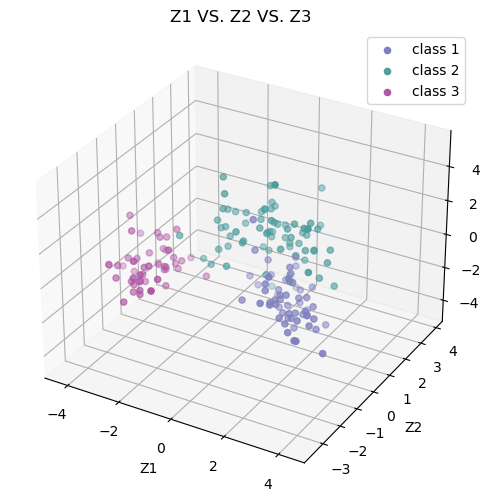

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 讀取資料
df1 = pd.read_excel('wine.xlsx')
df = df1.drop(columns=['Customer_Segment'])

# 標準化特徵
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# PCA
pca = PCA(n_components=3)  # 使用三個主成分
X_pca = pca.fit_transform(X_scaled)

# 獲取 Customer_Segment 列的唯一值
segments = df1['Customer_Segment'].unique()

# 定義顏色映射
colors = ['#8080C0', '#4F9D9D', '#AE57A4']

# 繪製三維散布圖，根據 Customer_Segment 分類並使用不同顏色
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d') # 111 表示將圖形分割成 1 行 1 列的子圖，並在第一個位置添加軸；projection='3d' 表示使用 3D 投影
for segment, color in zip(segments, colors): # X_pca[segment_indices, 0]、X_pca[segment_indices, 1] 和 X_pca[segment_indices, 2] 是三個主成分的值
    segment_indices = df1['Customer_Segment'] == segment
    ax.scatter(X_pca[segment_indices, 0], X_pca[segment_indices, 1], X_pca[segment_indices, 2], c=color, label=f'class {segment}')
ax.set_title('Z1 VS. Z2 VS. Z3')
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')
ax.legend()
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 將特徵對應的標籤塗上顏色添加到散佈圖上可以清楚地顯示資料點之間的分佈和結構。
- 即使使用 PCA 降維，仍然可能存在一些點被錯誤地歸類到其他群中的情況。
- 因為是立體圖，不同的視角可能會導致點的分群看起來模糊不清。
- 在展示立體圖時，有時候 Z3 軸的標籤會被遮擋而無法清晰顯示。
- 為了確保 Z3 軸標籤的可視性並獲得最佳的分群視野，我們需要調整圖形的視角。

依序上面的立體圖，接著再加入 `ax.view_init()` 函式來調整立體圖視角以取得最好的辨別視野。

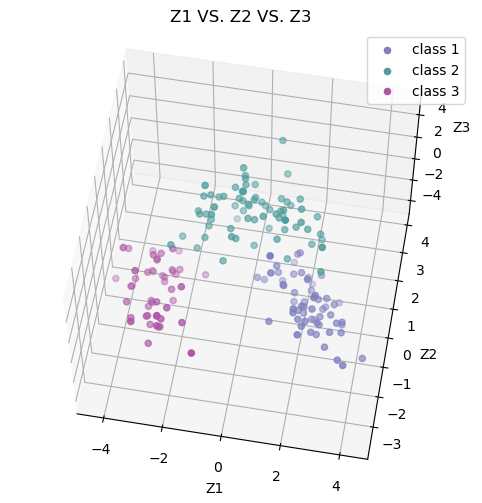

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 讀取資料
df1 = pd.read_excel('wine.xlsx')
df = df1.drop(columns=['Customer_Segment'])

# 標準化特徵
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# PCA
pca = PCA(n_components=3)  # 使用三個主成分
X_pca = pca.fit_transform(X_scaled)

# 獲取 Customer_Segment 列的唯一值
segments = df1['Customer_Segment'].unique()

# 定義顏色映射
colors = ['#8080C0', '#4F9D9D', '#AE57A4']

# 繪製三維散布圖，根據 Customer_Segment 分類並使用不同顏色
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d') # 111 表示將圖形分割成 1 行 1 列的子圖，並在第一個位置添加軸；projection='3d' 表示使用 3D 投影
for segment, color in zip(segments, colors): # X_pca[segment_indices, 0]、X_pca[segment_indices, 1] 和 X_pca[segment_indices, 2] 是三個主成分的值
    segment_indices = df1['Customer_Segment'] == segment
    ax.scatter(X_pca[segment_indices, 0], X_pca[segment_indices, 1], X_pca[segment_indices, 2], c=color, label=f'class {segment}')
ax.set_title('Z1 VS. Z2 VS. Z3')
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')
ax.view_init(elev=58, azim=-80)  # 設置視角的俯仰角和方位角

ax.legend()
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 透過設置 `elev=58`，我們將觀察角度調整成俯視 58 度，使得數據呈現更清晰的視野。
- 透過設置 `azim=-80`，我們將視角的方位角調整為 -80 度，進一步改善了立體圖的觀察角度。
- 經過視角的調整，立體圖中的分群變得更加清楚明瞭。
- Z1、Z2、Z3 的軸標籤也清晰顯示，提供了更好的數據解讀。

(7) Z_1 與 Z_2 都是從原變數組合而成的新變數，可否從 Z_1 與 Z_2 的組成係數，如式 (10)，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。

在先前計算主成分的程式碼後面，加上使用 `matplotlib` 繪製兩個柱狀圖。這兩個柱狀圖分別代表了前兩個主成分的特徵權重，其中不同的顏色表示不同的主成分，柱狀圖的高度則代表對應特徵的權重值。通過這些圖表，我們可以了解主成分 Z1 和 Z2 是由原始變數的哪些組成構成的，從而得知哪些原始變數對於主成分的貢獻比較重要，哪些比較不重要。

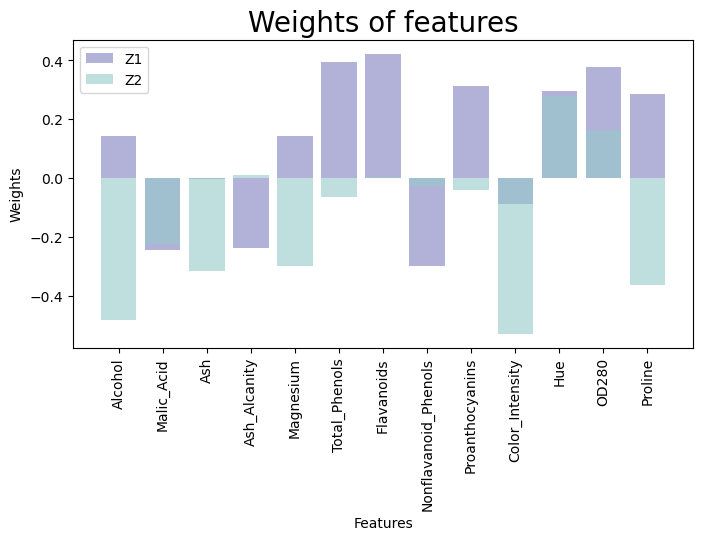

Top 3 absolute weights of the first principal component:
Index(['Flavanoids', 'Total_Phenols', 'OD280'], dtype='object')

Top 3 absolute weights of the second principal component:
Index(['Color_Intensity', 'Alcohol', 'Proline'], dtype='object')


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 讀取資料
df1 = pd.read_excel('wine.xlsx')
df = df1.drop(columns=['Customer_Segment'])

# 標準化特徵
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 權重的計算
weights = pca.components_
labels = df.columns

# 繪製主成分的權重條形圖
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(labels, weights[0, :], color='#8080C0', alpha=0.6, label='Z1') #使用PCA模型中的權重
ax.bar(labels, weights[1, :], color='#95CACA', alpha=0.6, label='Z2') 
ax.set_ylabel('Weights')
ax.set_xlabel('Features')
ax.set_title('Weights of features', fontsize = 20)
plt.xticks(rotation=90) # x 軸標籤 90 度旋轉
plt.legend()
plt.show()

# 列印並排序第一個主成分的前三個絕對值權重
sorted_indices_pc1 = np.argsort(np.abs(weights[0, :]))[::-1] # 反向排序
top_3_pc1 = df.columns[sorted_indices_pc1[:3]]
print("Top 3 absolute weights of the first principal component:")
print(top_3_pc1)

# 列印並排序第二個主成分的前三個絕對值權重
sorted_indices_pc2 = np.argsort(np.abs(weights[1, :]))[::-1] # 反向排序
top_3_pc2 = df.columns[sorted_indices_pc2[:3]]
print("\nTop 3 absolute weights of the second principal component:")
print(top_3_pc2)


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 透過直方圖，我們能夠觀察到主成分 Z1 和 Z2 中不同特徵的權重分佈情況，以便進行分析。
- X 軸代表特徵，Y 軸代表權重。
- 透過直方圖，我們可以得出對於 Z1 來說，權重最高的前 3 個特徵是 Flavanoids、Total_Phenols 及 OD280，這表明它們比起其他特徵更具重要性。
- 透過質方圖，我們可以得出對於 Z2 來說，權重最高的前 3 個特徵是 Color_Intensity、Alcohol 及 Proline，這表明它們比起其他特徵更具重要性。
- 對於主成分 Z1，對照原變數相關係數圖，觀察到變數之間的相關係數為 Flavanoids 與 Total_Phenols 之間的 0.86、Flavanoids 與 OD280 之間的 0.79，以及 Total_Phenols 與 OD280 之間的 0.7，它們之間的相關係數在相關係數矩陣中是最高的。
- 對於主成分 Z2，對照原變數相關係數圖，觀察到變數之間的相關係數為 Color_Intensity 與 Alcohol 之間的 0.55、Color_Intensity 與 Proline 之間的 0.32，以及 Alcohol 與 Proline 之間的 0.64，它們之間的相關係數在相關係數矩陣中也很高。
- 這反映了每個變數的權重表示了其在主成分中的重要性或貢獻度，主成分中權重最高的前三個變數，它們之間的相關係數會比較高。

<hr>
第 2 題：回答類似習題 1 的問題（如下所述），資料則是同樣來自 sklearn.datasets 的一組關於乳癌患者腫瘤的影像量測資料。量測變數共 30 個，樣本數為 569 位患者，區分為兩個群組，分別是 Malignant（惡性腫瘤）與 Benign（良性腫瘤）。請注意，由於變數多，因此如前一練習的相關性圖，必須做些改變。

首先，從 UCI ML Repository 中下載資料集，即可清楚觀察資料內部型態。

In [130]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [131]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [141]:
print(breast_cancer_wisconsin_diagnostic.variables)

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

(1) 繪製變數間的相關係數圖，以觀察變數間是否存在相關性。

首先，我們導入必要的庫，接著使用 `fetch_ucirepo` 函式來下載資料集，然後創建一個新的 Figure。接下來，計算特徵變數之間的相關性，並將結果存儲在變量 R 中。接著創建了一個遮罩（mask），將對角線以下的元素設置為 True，其他元素設置為 False，這樣做是因為相關係數矩陣是對稱的，所以只需要呈現下半部分。最後，我們使用 `Seaborn.heatmap` 函數繪製相關性矩陣的熱度圖，由於變數很多，熱度圖上的數字可能會顯得很密集，因此使用 `annot_kws` 參數來調整數字的顯示大小，這樣就能清晰地觀察變數之間的相關性，從而推斷乳癌患者腫瘤變數之間的關聯程度。

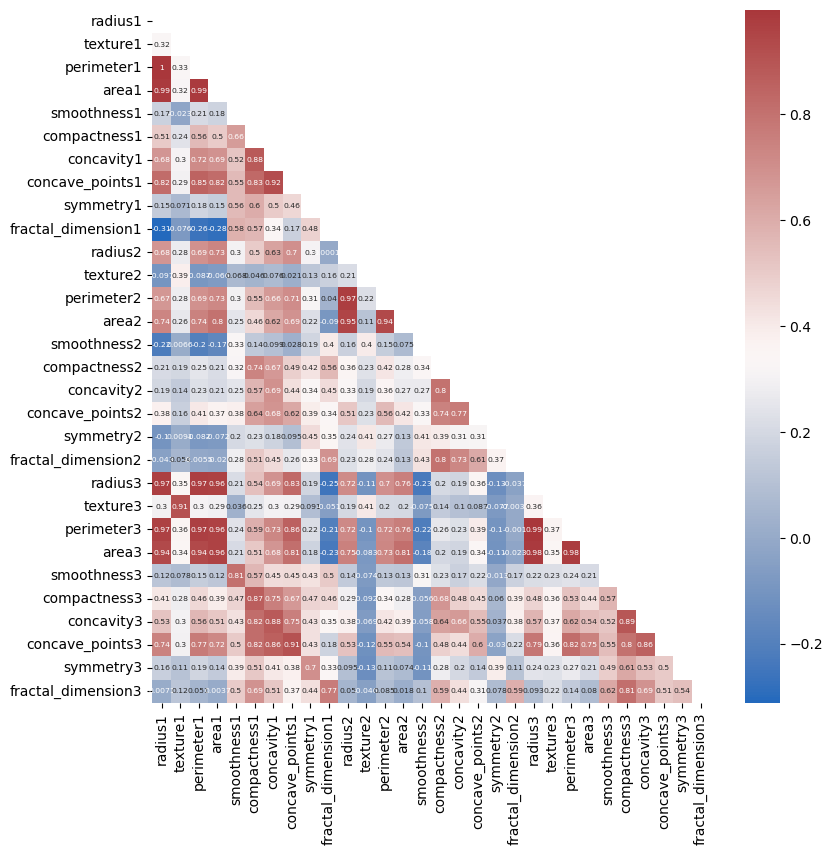

In [135]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

# Plot the correlation matrix
plt.figure(figsize=(9, 9))
R = X.corr()
mask = np.triu(np.ones_like(R, dtype=bool))  # diagonal mask 
seaborn.heatmap(R, annot=True, mask=mask, cmap='vlag', annot_kws={"fontsize":5.5})
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 相關係數矩陣為對稱矩陣，因此僅呈現下半部。
- 顏色越紅表示兩變數間呈現越強的正相關性、越深藍表示兩變數間呈現越強的負相關性。
- 顏色越淺藍表示兩變數之間的相關性越低。
- 正相關性最高的兩個變數為 perimeter1 以及 radius1，他們的相關係數為 1。
- 負相關性最高的兩個變數為 fractal_dimension1 以及 radius1，他們的相關係數為 -0.31。

(2) 繪製一張含每個量測變數的箱形圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考（如上題繪製的兩張 Boxplot 圖, 一張針對原始資料，另一張則是標準化後的資料）。

首先，我們導入必要的庫，接著使用 `fetch_ucirepo` 函式來下載資料集。左圖利用 `ax.boxplot()` 函式繪製每個成分的箱形圖，同時指定箱形圖的外觀屬性，以便直觀比較變數之間的分布差異。右圖中加入使用 `StandardScaler()` 函式對資料做標準化。

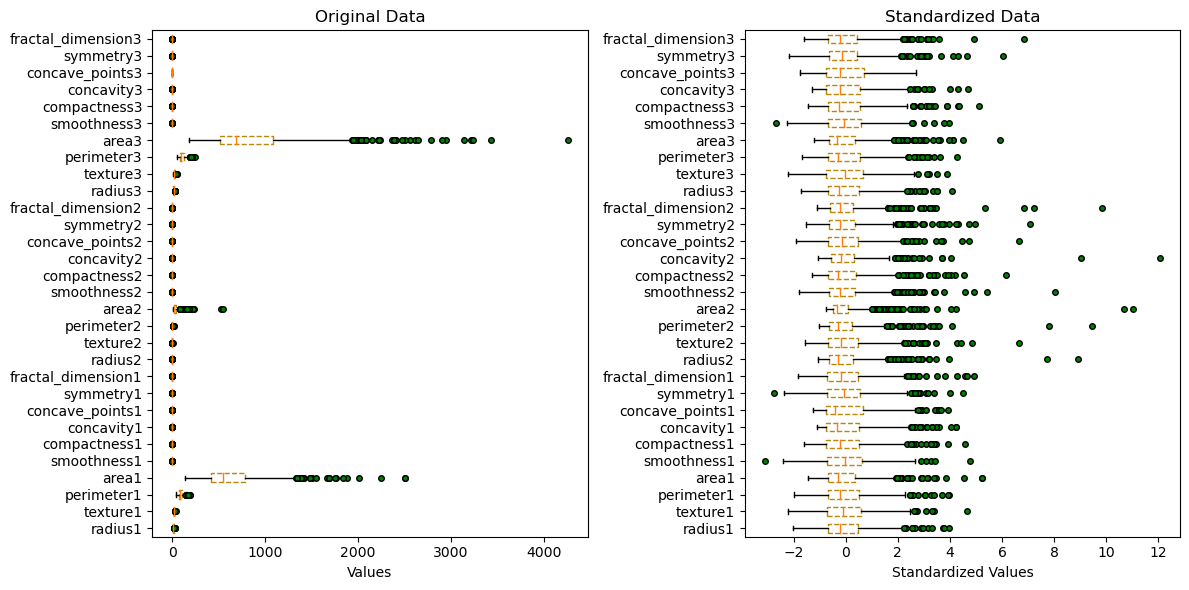

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

# Convert dataframes to numpy array
ratings = np.array(X)
categories = X.columns

# Standardize the data
scaler = StandardScaler()
ratings_std = scaler.fit_transform(ratings)

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot of original data
boxprops = dict(linestyle='--', linewidth=1, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none')
axes[0].boxplot(ratings, boxprops=boxprops, flierprops=flierprops, labels=categories, vert=False)
axes[0].set_xlabel('Values')
axes[0].set_title('Original Data')

# Boxplot of standardized data
boxprops_std = dict(linestyle='--', linewidth=1, color='darkgoldenrod')
flierprops_std = dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none')
axes[1].boxplot(ratings_std, boxprops=boxprops_std, flierprops=flierprops_std, labels=categories, vert=False)
axes[1].set_xlabel('Standardized Values')
axes[1].set_title('Standardized Data')

plt.tight_layout()
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 在左邊的圖中，由於腫瘤變數中的 area3 和 area1 值較大，將其與其他變數放在同一張圖中時，其他變數的分布範圍被壓縮，因此無法清楚觀察。
- 為了能夠清楚地觀察所有變數，需要對資料進行標準化處理。
- 左邊的圖為透過標準化後的資料，我們能夠清晰地觀察到所有變數本身的型態以及它們之間的關係。
- 在資料中，只有 concave_points3 沒有離群值。
- concave_points1 的分佈右偏最為嚴重，表示資料中有較多的值集中在較小的數值範圍內。
- texture3 的分佈左偏最為嚴重，表示資料中有較多的值集中在較大的數值範圍內。
- 在箱型圖中，四分位距最大的變數為 concave_points1 及 concave_points3，而最小的則是 area2。

(3) 進行主成分分析，繪製特徵值由大而小的分佈，如 scree plot 與累積百分比的 pareto plot。

首先，我們導入必要的庫，接著使用 `fetch_ucirepo` 函式來下載資料集。接著，將資料進行標準化處理，並將標準化後的資料轉換為 NumPy 陣列，隨後計算了標準化後資料基於樣本的共變異數矩陣 Sx_formula。利用 `numpy.linalg.eig`函數計算了 Sx 的特徵值和特徵向量，並將特徵值按降序排列。接著，利用特徵值和特徵向量構建了新的資料矩陣 Sigma_x，其中對角線元素為特徵值，其餘元素為零。\
創建一個新的 Matplotlib 圖形，並畫出一個折線圖，x 軸為特徵值的索引，y 軸為特徵值的大小，這個折線圖稱為 Scree 圖，用於顯示每個主成分的特徵值，以幫助選擇要保留的主成分數量。創建另一個 Matplotlib 圖形，並在同一張圖上繪製兩個軸，其中一個軸繪製特徵值的長條圖，另一個軸繪製解釋變異量的累積百分比，這個圖稱為 Pareto 圖，通常用於顯示主成分的累積貢獻，以幫助決定保留多少個主成分。

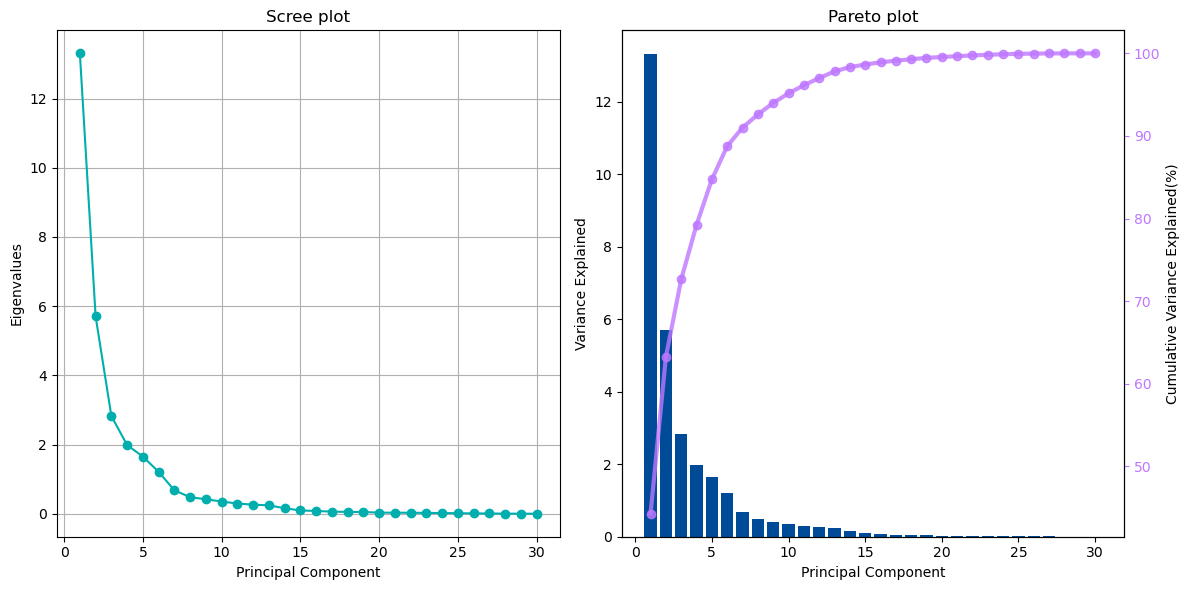

In [137]:
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

# Perform Standardization
ratings_ = StandardScaler().fit_transform(X)

# ratings_ is a 329 by 9 data matrix
Sx = np.cov(ratings_.T, bias=False) # Calculate the covariance matrix of the data matrix ratings_
N = ratings_.shape[0]
mu_x = ratings_.mean(axis = 0)
Tmp = ratings_ - mu_x # Compute the centered data matrix
Sx_formula = Tmp.T @ Tmp / (N - 1) # Calculate the covariance matrix based on samples

from numpy.linalg import eig
w, v = eig(Sx) # Eigenvalues and eigenvectors
idx = np.argsort(-w) # sort eigenvalues in descending order # Dimension reduction # Sort the eigenvalues in descending order
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T
# New data matrix Sigma_x, where the diagonal elements are the eigenvalues, and the rest are zeros

# Plot the Scree plot and Pareto plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scree plot
x = np.arange(1, 1+len(eigvals))
axs[0].plot(x, eigvals, marker='o', color='#00AEAE') 
axs[0].set_title('Scree plot')
axs[0].grid(True) 
axs[0].set_xlabel('Principal Component')
axs[0].set_ylabel('Eigenvalues')  # Add y-axis label

# Pareto plot
axs[1].bar(x, eigvals, color='#004B97') 
axs2 = axs[1].twinx()
axs2.plot(x, eigvals.cumsum()/eigvals.sum()*100, marker='o', color='#BE77FF', alpha=0.8, lw=3) 
axs2.tick_params(axis='y', colors='#BE77FF')
axs2.set_ylabel('Cumulative Variance Explained(%)')  # Add the second y-axis label
axs[1].set_xlabel('Principal Component')
axs[1].set_ylabel('Variance Explained')  # Add y-axis label
axs[1].set_title('Pareto plot')

plt.tight_layout()
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- Scree plot 是一種用於 PCA 的視覺化工具，其中 x 軸表示主成分，y 軸則表示對應的特徵值。
- 特徵值越小，其對應的主成分或因子所包含的信息量越少。當主成分數量增加時，特徵值呈現下降的趨勢。
- Pareto plot 顯示了每個主成分的貢獻度，以及主成分的累積貢獻度。
- 每個長條代表一個主成分，其高度代表該主成分的特徵值大小，即其貢獻度。
- 折線則表示累積貢獻度，以百分比表示，當折線越接近 100% 時，表示累積貢獻度越高，即前幾個主成分所包含的信息量越多。
- 在 Principal Component = 6 之後，曲線開始平緩，這個點之後的主成分所包含的信息量很少。
- 根據 Scree plot、Pareto plot 的趨勢選擇適當的主成分數量，忽略主成分數量大於 6 的部分，以達到降低數據維度的目的，同時保留足夠的信息量。

(4) 每筆資料都有標籤值（label），代表腫瘤的成分（Malignant（惡性腫瘤）或 Benign（良性腫瘤））。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散佈圖。是否可以從兩個主成分的散佈圖中看出兩個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察「做與不做」標準化的差別。

左圖是利用 PCA 取得前 2 項主成分並繪製散佈圖。右圖是先將特徵做標準化處理，再利用 PCA 取得前 2 項主成分並繪製散佈圖。

C:\Users\ChienYu\AppData\Local\Temp\ipykernel_24360\3373778359.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0].scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
C:\Users\ChienYu\AppData\Local\Temp\ipykernel_24360\3373778359.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[1].scatter(X_pca_std[:, 0], X_pca_std[:, 1], cmap='cooper')


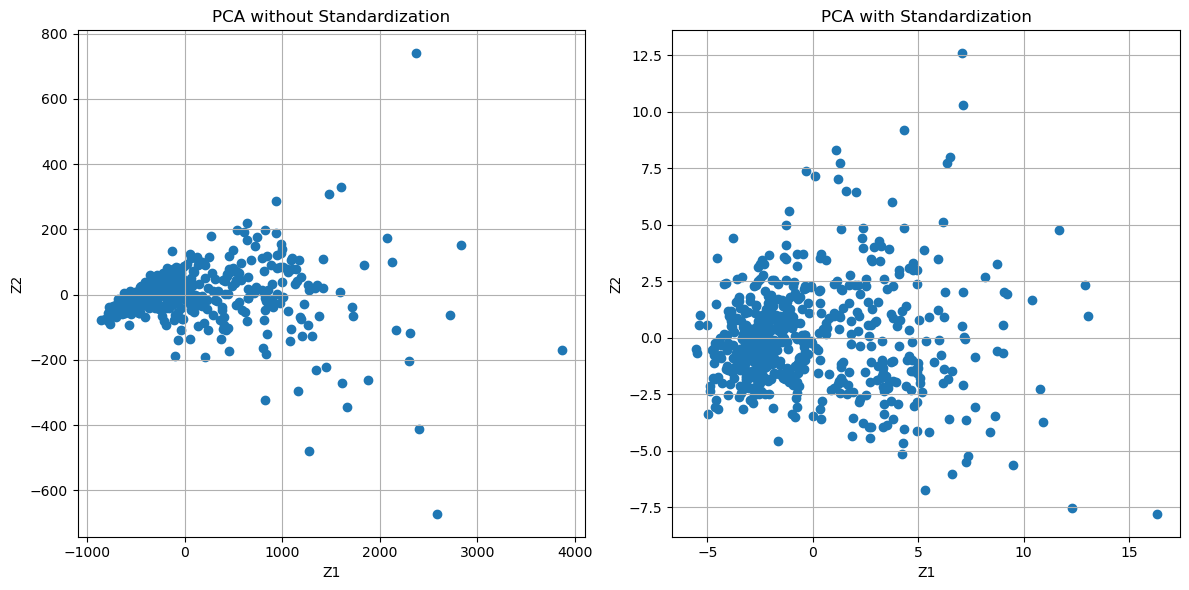

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# PCA without standardization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCA with standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_std = PCA(n_components=2)
X_pca_std = pca_std.fit_transform(X_scaled)

# Plotting the scatter plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot without standardization
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
axs[0].set_title('PCA without Standardization')
axs[0].set_xlabel('Z1')
axs[0].set_ylabel('Z2')
axs[0].grid(True)

# Scatter plot with standardization
axs[1].scatter(X_pca_std[:, 0], X_pca_std[:, 1], cmap='cooper')
axs[1].set_title('PCA with Standardization')
axs[1].set_xlabel('Z1')
axs[1].set_ylabel('Z2')
axs[1].grid(True)

plt.tight_layout()
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 在左圖中，變數並未經過標準化處理。
- 由於變數沒有經過標準化，不同變數之間的的尺度可能不同，這可能導致 PCA 對變數的變化更為敏感而受到影響。
- 當變數之間的尺度差異較大時，PCA 往往會更加受到主成分之間尺度差異的影響，進而導致得到的主成分之間的關係有所不同。
- 為了更準確地觀察散佈圖，需要對變數進行標準化處理。
- 右圖是將變數先經過標準化處理。
- 不同變數之間的的尺度相同，可以清楚地得到精確的散佈圖。
- 透過這張散佈圖，可以觀察到資料分佈呈現兩個主要群集，儘管這兩個群集並不是非常明顯，但相較於未經過標準化的資料，分群更加清晰顯著。
- 此兩群意味著是惡性腫瘤還是良性腫瘤。

(5) 再依據每筆資料的標籤，在散佈圖上塗上不同顏色（參考上題的圖）。

根據經標準化後的資料散佈圖，將每個分類的數據點以不同顏色進行了分組並繪製出來。

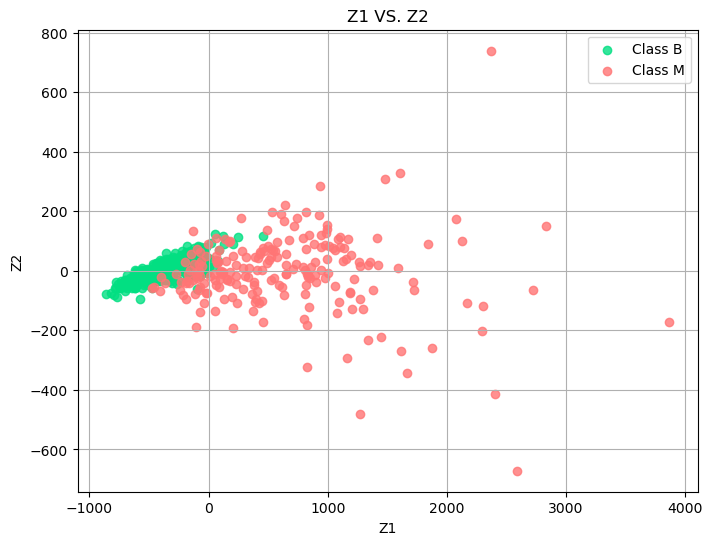

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo

# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# PCA
pca = PCA(n_components=2)  # Use PCA to get the first 2 principal components
X_pca = pca.fit_transform(X)

# 將y轉換為NumPy數組並展平
y_array = y.to_numpy().flatten()

# 繪製散點圖
plt.figure(figsize=(8, 6))
for label in np.unique(y_array):
    color = '#FF7575' if label == 'M' else '#02DF82' 
    plt.scatter(X_pca[y_array == label, 0], X_pca[y_array == label, 1], color=color, alpha = 0.8, label=f'Class {label}')

plt.title('Z1 VS. Z2')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.legend()
plt.grid(True)
plt.show()

#plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 將變數對應的標籤塗上顏色添加到散佈圖上可以更清楚地顯示資料點之間的分佈和結構。
- 在此散佈圖中，紅色點表示惡性腫瘤，綠色點表示良性腫瘤。
- 即使使用 PCA 降維，仍然可能存在一些點被錯誤地歸類到其他群中的情況。
- 這可能是因為 PCA 是根據資料中的變異性來找到新的特徵空間，有時無法捕捉到所有的資料結構，導致分類有誤差。
- 這種誤差通常是很小的，特別是當資料集的結構較簡單時。

(6) 如果採三個主成分，則可繪製立體圖。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

左圖是先將特徵做標準化處理，再利用 PCA 取得前 3 項主成分並繪製 3D 散佈立體圖。右圖是先將特徵做標準化處理，再利用 PCA 取得前 3 項主成分並繪製 3D 散佈立體圖，最後加入 `ax.view_init()` 函式來調整立體圖視角以取得最好的辨別視野。。

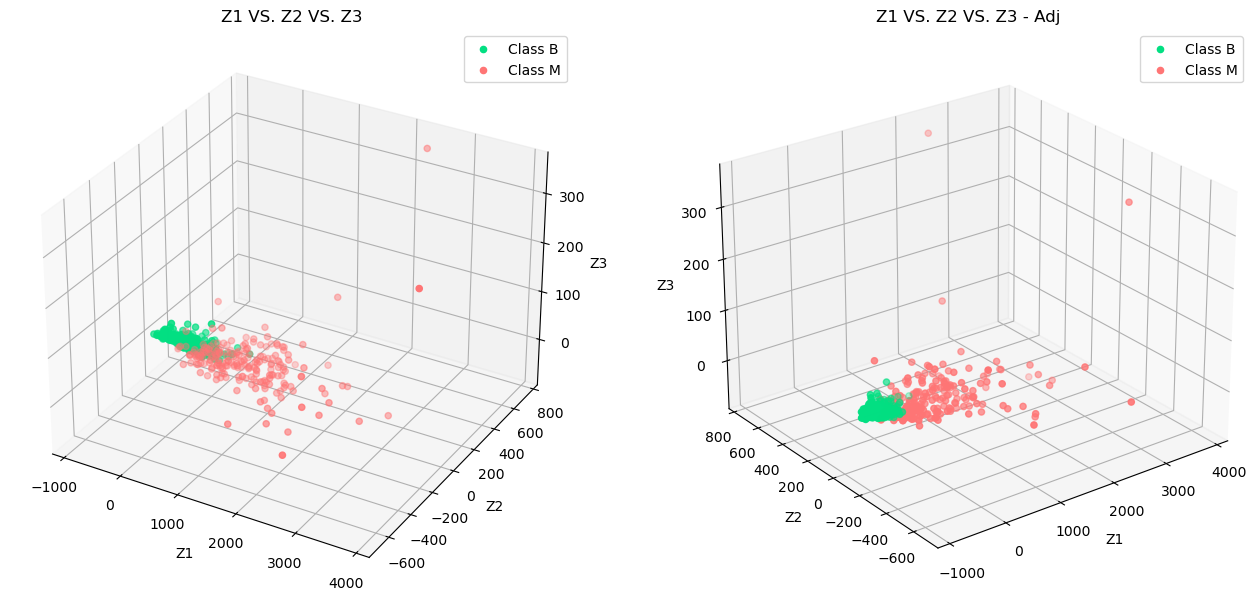

In [242]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Get unique values in y
segments = np.unique(y)

# Define colors
colors = ['#02DF82', '#FF7575']

# Plot 3D scatter plot
fig, axes = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})

for i, ax in enumerate(axes.flat):
    for segment, color in zip(segments, colors):
        segment_indices = (y == segment).values.ravel()
        ax.scatter(X_pca[segment_indices, 0], X_pca[segment_indices, 1], X_pca[segment_indices, 2], c=color, label=f'Class {segment}')

    #ax.set_title(f'Z1 VS. Z2 VS. Z3 - Plot {i+1}')
    ax.set_xlabel('Z1')
    ax.set_ylabel('Z2')
    ax.set_zlabel('Z3')
    ax.legend()

axes[0].set_title(f'Z1 VS. Z2 VS. Z3')
axes[1].set_title(f'Z1 VS. Z2 VS. Z3 - Adj')
axes[1].view_init(elev=25, azim=-127)

plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 左圖將特徵對應的標籤塗上顏色添加到散佈圖上可以清楚地顯示資料點之間的分佈和結構。
- 即使使用 PCA 降維，仍然可能存在一些點被錯誤地歸類到其他群中的情況。
- 因為是立體圖，不同的視角可能會導致點的分群看起來模糊不清。
- 為了獲得最佳的分群視野，我們需要調整圖形的視角。
- 右圖透過設置 `elev=25`，我們將觀察角度調整成俯視 25 度，使得數據呈現更清晰的視野。
- 右圖透過設置 `azim=-127`，我們將視角的方位角調整為 -127 度，進一步改善了立體圖的觀察角度。
- 經過視角的調整，立體圖中的分群變得更加清楚明瞭。

(7) Z_1 與 Z_2 都是從原變數組合而成的新變數，可否從 Z_1 與 Z_2 的組成係數，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。先不管理論怎麼說，就只是談談你的觀察與猜測。

在先前計算主成分的程式碼後面，加上使用 `matplotlib` 繪製兩個柱狀圖。這兩個柱狀圖分別代表了前兩個主成分的特徵權重，其中不同的顏色表示不同的主成分，柱狀圖的高度則代表對應特徵的權重值。通過這些圖表，我們可以了解主成分 Z1 和 Z2 是由原始變數的哪些組成構成的，從而得知哪些原始變數對於主成分的貢獻比較重要，哪些比較不重要。

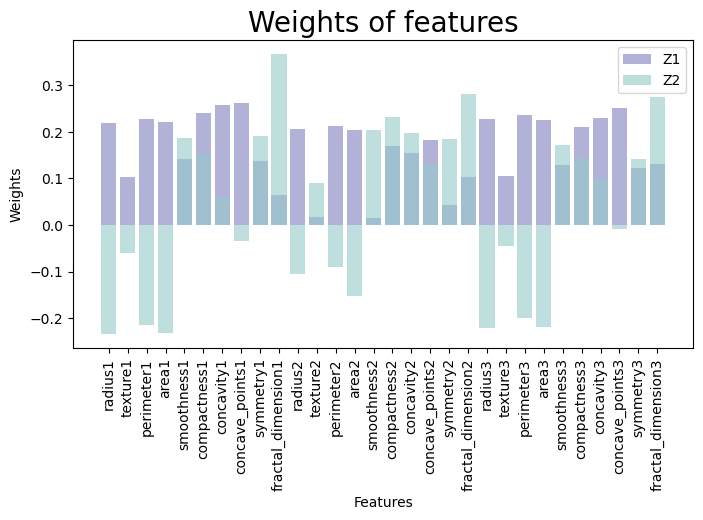

Top 3 absolute weights of the first principal component:
Index(['concave_points1', 'concavity1', 'concave_points3'], dtype='object')

Top 3 absolute weights of the second principal component:
Index(['fractal_dimension1', 'fractal_dimension2', 'fractal_dimension3'], dtype='object')


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# 讀取資料
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
labels = X.columns

# 標準化特徵
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 權重的計算
weights = pca.components_

# 繪製主成分的權重條形圖
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(labels, weights[0, :], color='#8080C0', alpha=0.6, label='Z1') # 使用PCA模型中的權重
ax.bar(labels, weights[1, :], color='#95CACA', alpha=0.6, label='Z2') 
ax.set_ylabel('Weights')
ax.set_xlabel('Features')
ax.set_title('Weights of features', fontsize=20)
plt.xticks(rotation=90) # x 軸標籤 90 度旋轉
plt.legend()
plt.show()

# 列印並排序第一個主成分的前三個絕對值權重
sorted_indices_pc1 = np.argsort(np.abs(weights[0, :]))[::-1] # 反向排序
top_3_pc1 = labels[sorted_indices_pc1[:3]]
print("Top 3 absolute weights of the first principal component:")
print(top_3_pc1)

# 列印並排序第二個主成分的前三個絕對值權重
sorted_indices_pc2 = np.argsort(np.abs(weights[1, :]))[::-1] # 反向排序
top_3_pc2 = labels[sorted_indices_pc2[:3]]
print("\nTop 3 absolute weights of the second principal component:")
print(top_3_pc2)


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 透過直方圖，我們能夠觀察到主成分 Z1 和 Z2 中不同特徵的權重分佈情況，以便進行分析。
- X 軸代表特徵，Y 軸代表權重。
- 透過直方圖，我們可以得出對於 Z1 來說，權重最高的前 3 個特徵是 concave_points1、concavity1 及 concave_points3，這表明它們相對於其他特徵更具重要性。
- 透過質方圖，我們可以得出對於 Z2 來說，權重最高的前 3 個特徵是 fractal_dimension1、fractal_dimension2 及 fractal_dimension3，這表明它們相對於其他特徵更具重要性。
- 對於主成分 Z1，對照原變數相關係數圖，觀察到變數之間的相關係數為 concave_points1 與 concavity1 之間的 0.92、concave_points1 與 concave_points3 之間的 0.91，以及 concavity1 與 concave_points3 之間的 0.86，它們之間的相關係數在相關係數矩陣中非常高。
- 對於主成分 Z2，對照原變數相關係數圖，觀察到變數之間的相關係數為 fractal_dimension1 與 fractal_dimension2 之間的 0.69、fractal_dimension1 與 fractal_dimension3 之間的 0.77，以及 fractal_dimension2 與 fractal_dimension3 之間的 0.59，它們之間的相關係數在相關係數矩陣中也很高。
- 這反映了每個變數的權重表示了其在主成分中的重要性或貢獻度，主成分中權重最高的前三個變數，它們之間的相關係數會比較高。